### Лабораторная работа №4. Реализация приложения по распознаванию номеров домов.

Данные: Набор изображений из Google Street View с изображениями номеров домов, содержащий 10 классов, соответствующих цифрам от 0 до 9.

73257 изображений цифр в обучающей выборке;  
26032 изображения цифр в тестовой выборке;  
531131 изображения, которые можно использовать как дополнение к обучающей выборке;  

В двух форматах:
1. Оригинальные изображения с выделенными цифрами;
2. Изображения размером 32 × 32, содержащих одну цифру;

Данные первого формата можно скачать по ссылкам:
1. http://ufldl.stanford.edu/housenumbers/train.tar.gz (обучающая выборка);
2. http://ufldl.stanford.edu/housenumbers/test.tar.gz (тестовая выборка);
3. http://ufldl.stanford.edu/housenumbers/extra.tar.gz (дополнительные данные);

Данные второго формата можно скачать по ссылкам:
1. http://ufldl.stanford.edu/housenumbers/train_32x32.mat (обучающая выборка);
2. http://ufldl.stanford.edu/housenumbers/test_32x32.mat (тестовая выборка);
3. http://ufldl.stanford.edu/housenumbers/extra_32x32.mat (дополнительные данные);

Описание данных на английском языке доступно по ссылке: http://ufldl.stanford.edu/housenumbers/

Задание 1.
Реализуйте глубокую нейронную сеть (полносвязную или сверточную) и обучите ее на синтетических данных (например, наборы MNIST (http://yann.lecun.com/exdb/mnist/) или notMNIST). Ознакомьтесь с имеющимися работами по данной тематике: англоязычная статья (http://static.googleusercontent.com/media/research.google.com/en//pubs/archive/42241.pdf), видео на YouTube (https://www.youtube.com/watch?v=vGPI_JvLoN0).

Задание 2.
После уточнения модели на синтетических данных попробуйте обучить ее на реальных данных (набор Google Street View). Что изменилось в модели?

Задание 3.
Сделайте множество снимков изображений номеров домов с помощью смартфона на ОС Android. Также можно использовать библиотеки OpenCV, Simple CV или Pygame для обработки изображений с общедоступных камер видеонаблюдения (например, https://www.earthcam.com/).
Пример использования библиотеки TensorFlow на смартфоне можете воспользоваться демонстрационным приложением от Google (https://github.com/tensorflow/tensorflow/tree/master/tensorflow/examples/android).
 

Задание 4.
Реализуйте приложение для ОС Android, которое может распознавать цифры в номерах домов, используя разработанный ранее классификатор. Какова доля правильных классификаций?

Результат выполнения заданий опишите в отчете.


In [4]:
!mkdir -p storage/housenumbers

!wget http://ufldl.stanford.edu/housenumbers/train_32x32.mat
!wget http://ufldl.stanford.edu/housenumbers/test_32x32.mat
!wget http://ufldl.stanford.edu/housenumbers/extra_32x32.mat

--2020-04-09 22:16:15--  http://ufldl.stanford.edu/housenumbers/train_32x32.mat
Resolving ufldl.stanford.edu (ufldl.stanford.edu)... 171.64.68.10
Connecting to ufldl.stanford.edu (ufldl.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 182040794 (174M) [text/plain]
Saving to: ‘train_32x32.mat.1’

train_32x32.mat.1   100%[===================>] 173.61M  1.36MB/s    in 1m 44s  

2020-04-09 22:18:00 (1.67 MB/s) - ‘train_32x32.mat.1’ saved [182040794/182040794]

--2020-04-09 22:18:00--  http://storage/housenumbers/train_32x32.mat
Resolving storage (storage)... failed: No address associated with hostname.
wget: unable to resolve host address ‘storage’
FINISHED --2020-04-09 22:18:00--
Total wall clock time: 1m 45s
Downloaded: 1 files, 174M in 1m 44s (1.67 MB/s)
--2020-04-09 22:18:00--  http://ufldl.stanford.edu/housenumbers/test_32x32.mat
Resolving ufldl.stanford.edu (ufldl.stanford.edu)... 171.64.68.10
Connecting to ufldl.stanford.edu (ufldl.

In [60]:
import numpy as np
import pandas as pd
import tensorflow as tf


import matplotlib.pyplot as plt
%matplotlib inline

MNIST pretrain

In [61]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

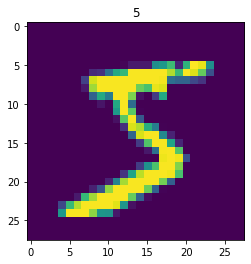

In [62]:
plt.title(y_train[0])
plt.imshow(X_train[0, :, :, 0])

In [63]:
X_train.shape, y_train.shape

((60000, 28, 28, 1), (60000,))

In [64]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D, Flatten, Dense, Activation

def build_model(image_shape, num_classes=10):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', input_shape=image_shape))
    model.add(Activation('relu'))
    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))
    
    return model

In [65]:
model = build_model(X_train.shape[1:], num_classes=len(np.unique(y_train)))

In [66]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=128, epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 59us/sample - loss: 0.4075 - accuracy: 0.9444 - val_loss: 0.0466 - val_accuracy: 0.9853
Epoch 2/10
60000/60000 [==============================] - 3s 51us/sample - loss: 0.0430 - accuracy: 0.9866 - val_loss: 0.0419 - val_accuracy: 0.9863
Epoch 3/10
60000/60000 [==============================] - 3s 51us/sample - loss: 0.0286 - accuracy: 0.9910 - val_loss: 0.0352 - val_accuracy: 0.9896
Epoch 4/10
60000/60000 [==============================] - 3s 51us/sample - loss: 0.0245 - accuracy: 0.9923 - val_loss: 0.0368 - val_accuracy: 0.9895
Epoch 5/10
60000/60000 [==============================] - 3s 50us/sample - loss: 0.0198 - accuracy: 0.9938 - val_loss: 0.0328 - val_accuracy: 0.9901
Epoch 6/10
60000/60000 [==============================] - 3s 50us/sample - loss: 0.0173 - accuracy: 0.9944 - val_loss: 0.0389 - val_accuracy: 0.9897
Epoch 7/10
60000/60000 [==============================] 

Housenumbers

In [82]:
import scipy.io

train = scipy.io.loadmat("train_32x32.mat")
X_train, y_train = train["X"], train["y"]

X_train = np.moveaxis(X_train, -1, 0)
y_train = y_train.flatten() - 1

test = scipy.io.loadmat("test_32x32.mat")
X_test, y_test = test["X"], test["y"]

X_test = np.moveaxis(X_test, -1, 0)
y_test = y_test.flatten() - 1

In [83]:
X_train.shape, y_train.shape

((73257, 32, 32, 3), (73257,))

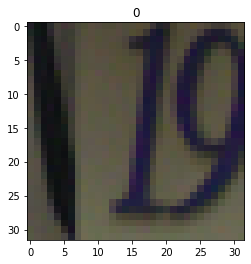

In [84]:
plt.title(y_train[0])
plt.imshow(X_train[0])

In [95]:
model = build_model(X_train.shape[1:], num_classes=len(np.unique(y_train)))

In [96]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=128, epochs=5)

Train on 73257 samples, validate on 26032 samples
Epoch 1/5
73257/73257 [==============================] - 5s 68us/sample - loss: 1.2338 - accuracy: 0.6619 - val_loss: 0.7399 - val_accuracy: 0.7848
Epoch 2/5
73257/73257 [==============================] - 4s 61us/sample - loss: 0.5033 - accuracy: 0.8527 - val_loss: 0.4854 - val_accuracy: 0.8654
Epoch 3/5
73257/73257 [==============================] - 5s 63us/sample - loss: 0.3635 - accuracy: 0.8936 - val_loss: 0.4358 - val_accuracy: 0.8811
Epoch 4/5
73257/73257 [==============================] - 5s 62us/sample - loss: 0.2862 - accuracy: 0.9165 - val_loss: 0.4211 - val_accuracy: 0.8885
Epoch 5/5
73257/73257 [==============================] - 5s 62us/sample - loss: 0.2328 - accuracy: 0.9306 - val_loss: 0.4404 - val_accuracy: 0.8931


In [110]:
test_predicted = np.argmax(model.predict(X_test), axis=1)

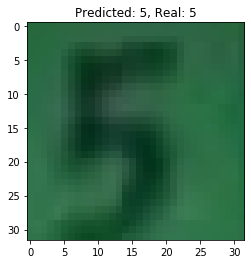

In [114]:
idx = 0
plt.title(f"Predicted: {test_predicted[idx] + 1}, Real: {y_test[idx] + 1}")
plt.imshow(X_test[idx])